<h1><center> Домашняя работа #4</center></h1>

Задача:

- Реализовать класс, моделирующий стохастическую среду Frozen Lake 8x8.
- Обучить агента Dyna-Q, использующего стохастическую модель среды и сравнить с простым Q-агентом.

Описание задачи на сайте Gymnasium ([ссылка](https://gymnasium.farama.org/environments/box2d/lunar_lander/))

## Imports

In [1]:
!nvidia-smi

'nvidia-smi' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
import sys

sys.path.append("..")

In [3]:
import gymnasium as gym
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import torch

from tqdm import trange

In [60]:
%load_ext autoreload
%autoreload 2

from src.torch_utils import get_device
from src.q_learning import train_with_q_learning
from src.dyna_q import DynaQModel

## Simple Q-Learning

**Note** `pip install "gymnasium[box2d]"` fails horribly. Install `swig` and then `Box2D`. It's also in requirements

Source [Git](https://github.com/Farama-Foundation/Gymnasium/issues/1324#issuecomment-2700987713)

In [51]:
# %pip install swig Box2D

In [58]:
env = gym.make(
    "FrozenLake8x8-v1",
    is_slippery=False,
    map_name="8x8",
    max_episode_steps=1_000,
    # render_mode="human",
)

In [45]:
# Основные параметры
alpha = 0.1  # learning_rate
gamma = 0.6  # discount_factor
epsilon = 0.1  # probability of random action

n_epochs = 100_000

In [48]:
q_table, rewards = train_with_q_learning(
    env=env,
    alpha=alpha,
    gamma=gamma,
    epsilon=epsilon,
    exploratory_period=2_000,
    n_epochs=n_epochs,
    print_every=5_000,
)

  0%|                                                                             | 94/100000 [00:00<03:38, 457.49it/s]

episode=0 reward 0,  # penalties 0, # steps 14


  5%|███▊                                                                      | 5175/100000 [00:06<01:25, 1114.52it/s]

episode=5000 reward 1,  # penalties 0, # steps 16


 10%|███████▍                                                                 | 10170/100000 [00:10<01:21, 1099.56it/s]

episode=10000 reward 1,  # penalties 0, # steps 17


 15%|███████████                                                              | 15145/100000 [00:15<01:13, 1161.75it/s]

episode=15000 reward 1,  # penalties 0, # steps 16


 20%|██████████████▋                                                          | 20111/100000 [00:19<01:05, 1213.47it/s]

episode=20000 reward 1,  # penalties 0, # steps 14


 25%|██████████████████▍                                                      | 25230/100000 [00:23<00:58, 1273.04it/s]

episode=25000 reward 0,  # penalties 0, # steps 9


 30%|██████████████████████                                                   | 30229/100000 [00:28<01:01, 1128.50it/s]

episode=30000 reward 1,  # penalties 0, # steps 14


 35%|█████████████████████████▌                                               | 35008/100000 [00:32<00:51, 1269.45it/s]

episode=35000 reward 1,  # penalties 0, # steps 18


 40%|█████████████████████████████▎                                           | 40132/100000 [00:36<00:52, 1137.59it/s]

episode=40000 reward 1,  # penalties 0, # steps 16


 45%|████████████████████████████████▉                                        | 45117/100000 [00:40<00:41, 1334.54it/s]

episode=45000 reward 1,  # penalties 0, # steps 22


 50%|████████████████████████████████████▌                                    | 50153/100000 [00:45<00:48, 1022.49it/s]

episode=50000 reward 1,  # penalties 0, # steps 14


 55%|████████████████████████████████████████▏                                | 55094/100000 [00:49<00:40, 1114.10it/s]

episode=55000 reward 1,  # penalties 0, # steps 16


 60%|███████████████████████████████████████████▉                             | 60231/100000 [00:53<00:36, 1102.36it/s]

episode=60000 reward 1,  # penalties 0, # steps 14


 65%|███████████████████████████████████████████████▌                         | 65172/100000 [00:57<00:29, 1175.73it/s]

episode=65000 reward 1,  # penalties 0, # steps 14


 70%|███████████████████████████████████████████████████▏                     | 70143/100000 [01:01<00:26, 1145.64it/s]

episode=70000 reward 1,  # penalties 0, # steps 15


 75%|██████████████████████████████████████████████████████▊                  | 75141/100000 [01:05<00:21, 1150.80it/s]

episode=75000 reward 1,  # penalties 0, # steps 14


 76%|███████████████████████████████████████████████████████▏                 | 75550/100000 [01:06<00:20, 1217.69it/s]Exception ignored in: <function tqdm.__del__ at 0x0000011CC2575D00>
Traceback (most recent call last):
  File "C:\Users\Ivan\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\std.py", line 1148, in __del__
    self.close()
  File "C:\Users\Ivan\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\rich.py", line 119, in close
    self.display()  # print 100%, vis #1306
    ^^^^^^^^^^^^^^
  File "C:\Users\Ivan\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\rich.py", line 129, in display
    self._prog.update(self._task_id, completed=self.n, description=self.desc)
                      ^^^^^^^^^^^^^
AttributeError: 'tqdm_rich' object has no attribute '_task_id'
 80%|██████████████████████████████████████████████████████████▌              | 80161/100000 [01:10<00:18, 1050.89it/s]

episode=80000 reward 1,  # penalties 0, # steps 14


 85%|██████████████████████████████████████████████████████████████▏          | 85212/100000 [01:14<00:11, 1247.11it/s]

episode=85000 reward 1,  # penalties 0, # steps 14


 90%|█████████████████████████████████████████████████████████████████▊       | 90211/100000 [01:18<00:07, 1246.61it/s]

episode=90000 reward 1,  # penalties 0, # steps 14


 95%|█████████████████████████████████████████████████████████████████████▍   | 95115/100000 [01:22<00:03, 1324.17it/s]

episode=95000 reward 1,  # penalties 0, # steps 14


100%|████████████████████████████████████████████████████████████████████████| 100000/100000 [01:25<00:00, 1167.04it/s]


In [49]:
table = pd.DataFrame(rewards, columns=["reward", "penalty", "steps"])
table = table.iloc[2_000:, :]  # remove exploratory_period

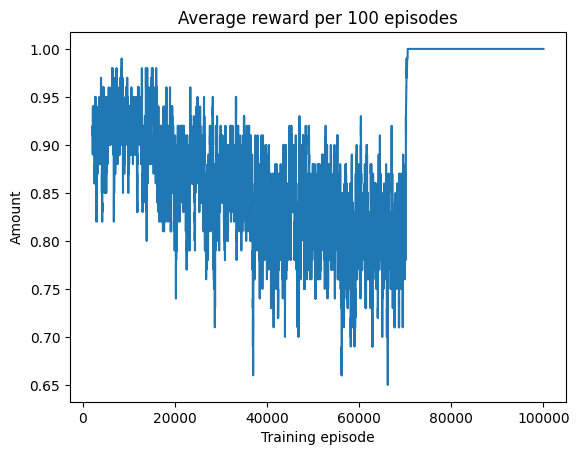

In [50]:
plt.plot(table.index, table["reward"].rolling(100).mean())
plt.xlabel("Training episode")
plt.ylabel("Amount")
plt.title("Average reward per 100 episodes")
plt.show()

In [67]:
env = gym.make(
    "FrozenLake8x8-v1",
    is_slippery=False,
    map_name="8x8",
    max_episode_steps=1_000,
    render_mode="human",
)

In [78]:
# https://github.com/openai/gym/issues/741#issuecomment-778703878
done = False
score = 0
state, _ = env.reset()
example_steps = 10

while not done:
    env.render()  # Раскомментируйте, чтобы увидеть игру
    action = np.argmax(q_table[state, :])
    next_state, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated
    state = next_state
    score += reward

env.close()

print(f"Score is: {score}")

Score is: 1


C:\Users\Ivan\AppData\Local\Programs\Python\Python312\Lib\site-packages\gymnasium\envs\toy_text\frozen_lake.py:353: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym.make("FrozenLake8x8-v1", render_mode="rgb_array")
  gym.logger.warn(


---
## Dyna-Q

In [97]:
env = gym.make(
    "FrozenLake8x8-v1",
    is_slippery=False,
    map_name="8x8",
    max_episode_steps=1_000,
    # render_mode="human",
)

In [98]:
action_size = env.action_space.n
state_size = env.observation_space.n

In [99]:
agent = DynaQModel(
    state_size=state_size,
    action_size=action_size,
    alpha=alpha,
    gamma=gamma,
    epsilon=1.0,
    epsilon_decay=0.995,
    epsilon_min=0.01,
    n_planning=100,
    kappa=0.001,
    initial_q=0.0,
)

In [100]:
train_stats = agent.train(env=env, n_episodes=2000, max_steps=1000, log_interval=100)

Episode  100 | Avg Reward:    0.00 | Success Rate:   0.0% | Avg Steps:   26.2 | Epsilon: 0.606 | Visited SA:   161
Episode  200 | Avg Reward:    0.12 | Success Rate:  12.0% | Avg Steps:   28.9 | Epsilon: 0.367 | Visited SA:   187
Episode  300 | Avg Reward:    0.20 | Success Rate:  20.0% | Avg Steps:   31.9 | Epsilon: 0.222 | Visited SA:   192
Episode  400 | Avg Reward:    0.53 | Success Rate:  53.0% | Avg Steps:   26.0 | Epsilon: 0.135 | Visited SA:   196
Episode  500 | Avg Reward:    0.62 | Success Rate:  62.0% | Avg Steps:   27.1 | Epsilon: 0.082 | Visited SA:   200
Episode  600 | Avg Reward:    0.64 | Success Rate:  64.0% | Avg Steps:   27.1 | Epsilon: 0.049 | Visited SA:   206
Episode  700 | Avg Reward:    0.69 | Success Rate:  69.0% | Avg Steps:   29.5 | Epsilon: 0.030 | Visited SA:   206
Episode  800 | Avg Reward:    0.73 | Success Rate:  73.0% | Avg Steps:   29.8 | Epsilon: 0.018 | Visited SA:   208
Episode  900 | Avg Reward:    0.75 | Success Rate:  75.0% | Avg Steps:   28.2 | 

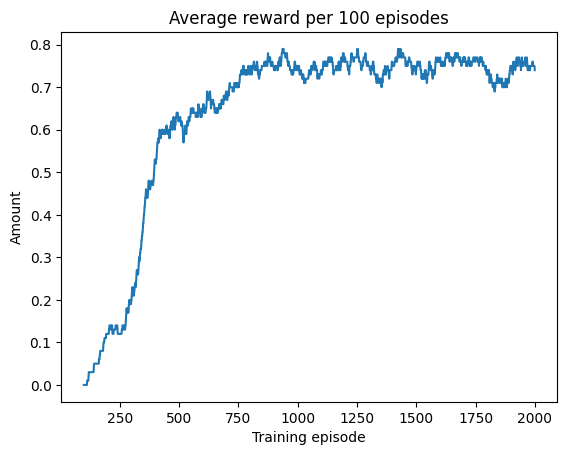

In [106]:
pd.DataFrame(train_stats["episode_rewards"]).rolling(100).mean().plot(legend=False)
plt.xlabel("Training episode")
plt.ylabel("Amount")
plt.title("Average reward per 100 episodes")
plt.show()

In [107]:
env = gym.make(
    "FrozenLake8x8-v1",
    is_slippery=False,
    map_name="8x8",
    max_episode_steps=1_000,
    render_mode="human",
)

In [109]:
# https://github.com/openai/gym/issues/741#issuecomment-778703878
done = False
score = 0
state, _ = env.reset()

while not done:
    env.render()  # Раскомментируйте, чтобы увидеть игру
    action = np.argmax(agent.q_table[state, :])
    next_state, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated
    state = next_state
    score += reward

env.close()

print(f"Score is: {score}")

KeyboardInterrupt: 

In [110]:
env.close()